In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
img1 = cv2.imread('DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [47]:
img1 = cv2.resize(img1, (1200,1200))
img2 = cv2.resize(img2, (1200,1200))

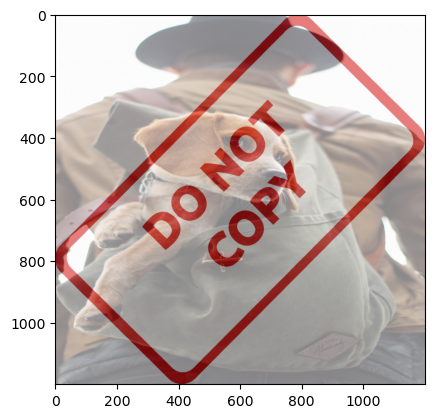

In [65]:
# blended=img1×α+img2×β+γ -> only works when the images are the same size
blended = cv2.addWeighted(src1=img1, alpha=0.5, src2=img2, beta=0.5, gamma=0)
plt.imshow(blended)

In [67]:
# overlay small image on top of  a larger image (no blending)

In [69]:
img1 = cv2.imread('DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [73]:
img2 = cv2.resize(img2, (600,600))

In [75]:
large_img = img1
small_img = img2

In [77]:
x_offset = 0
y_offset = 0

In [79]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [81]:
large_img[:x_end,:y_end] = small_img # large_img[x_offset:x_end, y_offset:y_end]

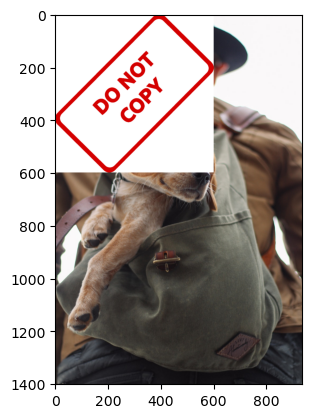

In [83]:
plt.imshow(large_img)

In [4]:
# blend together images of different sizes

In [34]:
img1 = cv2.imread('DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [36]:
img2 = cv2.resize(img2, (600,600))
img1.shape

(1401, 934, 3)

In [38]:
x_offset = 934 - 600
y_offset = 1401 - 600

In [40]:
row, column, channel = img2.shape

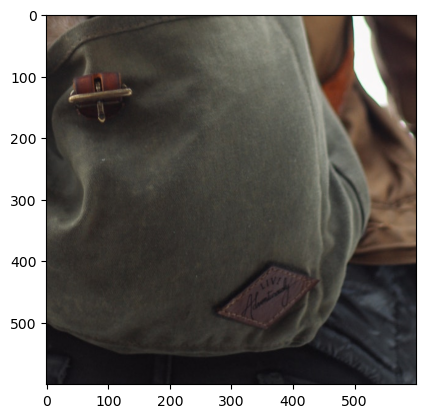

In [42]:
roi = img1[y_offset:1401, x_offset:934]
plt.imshow(roi)

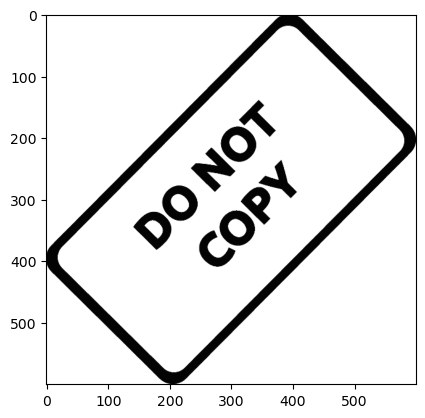

In [44]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray, cmap="gray")

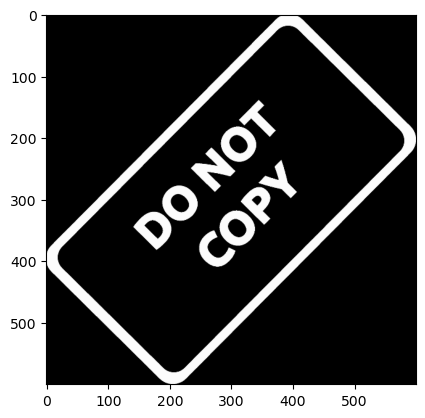

In [46]:
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv, cmap="gray")

In [48]:
mask_inv.shape # it no longer contain color channels

(600, 600)

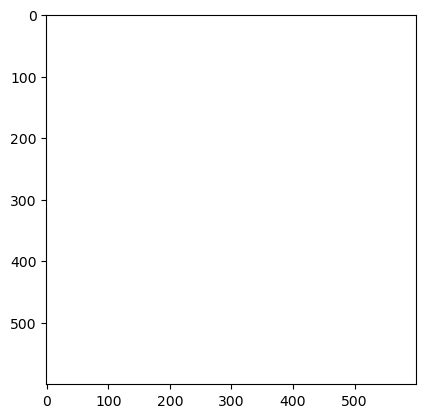

In [50]:
white_img = np.full(img2.shape, 255, dtype=np.uint8)
# np.full(shape -> tuple, fill_value -> constant value, dtype)
plt.imshow(white_img)

(600, 600, 3)


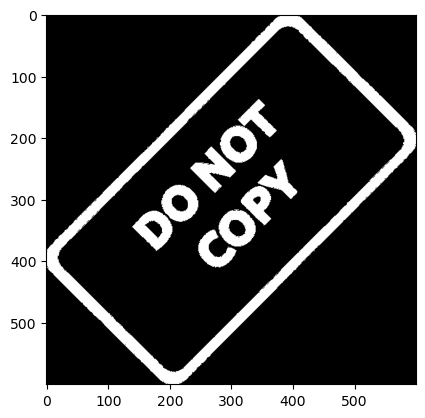

In [54]:
bk = cv2.bitwise_or(white_img, white_img, mask= mask_inv)
plt.imshow(bk)
print(bk.shape)

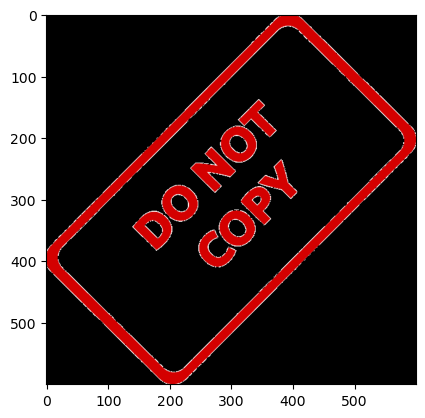

In [56]:
fg = cv2.bitwise_or(img2, img2, mask= mask_inv)
plt.imshow(fg)

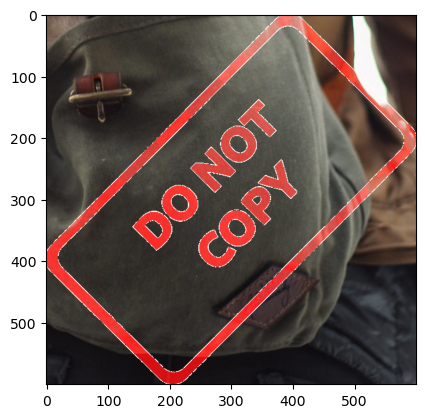

In [58]:
final_roi = cv2.bitwise_or(roi, fg)
plt.imshow(final_roi)

In [60]:
large_img = img1
small_img = final_roi

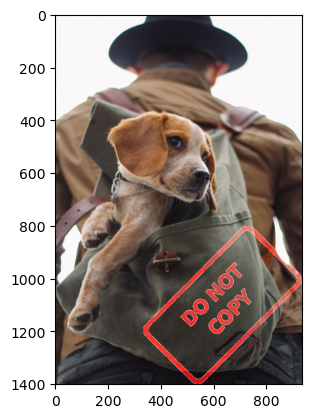

In [64]:
large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]] = small_img
plt.imshow(large_img)